Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

      0 to 2       0.00      0.00      0.00         1
      2 to 5       0.60      0.75      0.67         4
     5 to 10       1.00      0.75      0.86         4
     5 to 19       0.00      0.00      0.00         0

    accuracy                           0.67         9
   macro avg       0.40      0.38      0.38         9
weighted avg       0.71      0.67      0.68         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

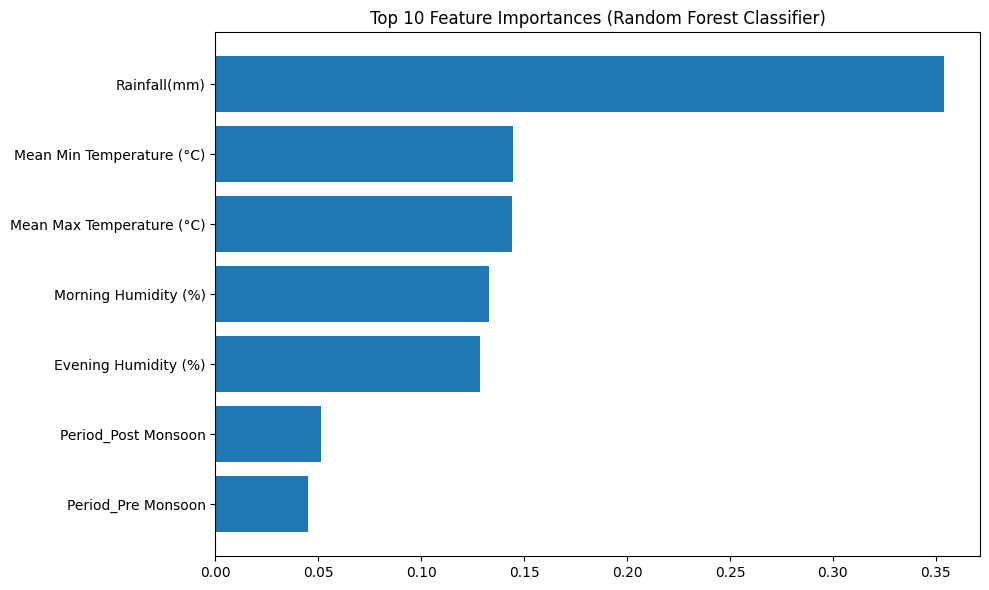

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Load the data with encoding
file_path = '/content/sample_data/Jharkhand_Final_Data(Sheet1).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 2. Drop rows with missing values
df = df.dropna()

# 3. Define target and features
target_column = 'GWL (In mbgl)'
X = df.drop(columns=[target_column])
y = df[target_column]

# 4. Convert all categorical columns using one-hot encoding
X = pd.get_dummies(X)

# 5. Label encode the target variable (ranges like '5 to 10')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 6. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 7. Train Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 9. Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-10:][::-1]  # top 10 features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest Classifier)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
